In [57]:
import os
import numpy as np
import pandas as pd
from matplotlib import cm
from tqdm import tqdm
import json
import anndata as ad

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

from scipy.stats import pearsonr
import scipy.sparse

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [58]:
adata = sc.read_h5ad("/data/projects/robin/segmentation/new-slide-glom-periglom-ps/pseudotime.h5ad")

In [59]:
adata.obs

,Disease,dpt_pseudotime,Pseudotime,Slide_ID,Ki67_prot,CD44_prot,TGFB,PDGF
polygon_flags,,,,,,,,
0_0011186_ANCA_X3_slide2,ANCA,0.557568,0.557568,0011186,3.169925,13.225659,0.039008,0.009414
0_0011186_ANCA_X4_slide2,ANCA,0.416435,0.416435,0011186,0.000000,1.000000,0.020137,0.072077
0_0011186_ANCA_X6_slide2,ANCA,0.417834,0.417834,0011186,12.573411,14.814282,0.004359,0.047995
0_0011186_Cntrl_X1_slide2,Control,0.000000,0.000000,0011186,0.000000,0.000000,0.001060,0.038192
0_0011186_Cntrl_X2_slide2,Control,0.106783,0.106783,0011186,0.000000,1.000000,0.033462,0.053815
...,...,...,...,...,...,...,...,...
7_0011186_Cntrl_X2_slide2,Control,0.239479,0.239479,0011186,3.000000,0.000000,0.005284,0.021387
8_0011186_Cntrl_X1_slide2,Control,0.075411,0.075411,0011186,10.202124,13.682007,0.006020,0.054870
8_0011186_Cntrl_X2_slide2,Control,0.283191,0.283191,0011186,0.000000,0.000000,0.005646,0.011361


In [60]:
disease_set = adata.obs['Disease'].unique()
disease_set

['ANCA', 'Control', 'aGBM', 'SLE']
Categories (4, object): ['Control', 'SLE', 'ANCA', 'aGBM']

In [61]:
disease_order = ['Control', 'SLE', 'ANCA', 'aGBM']
df = adata.obs
df['label'] = pd.Categorical(df['Disease'], categories=disease_order, ordered=True)

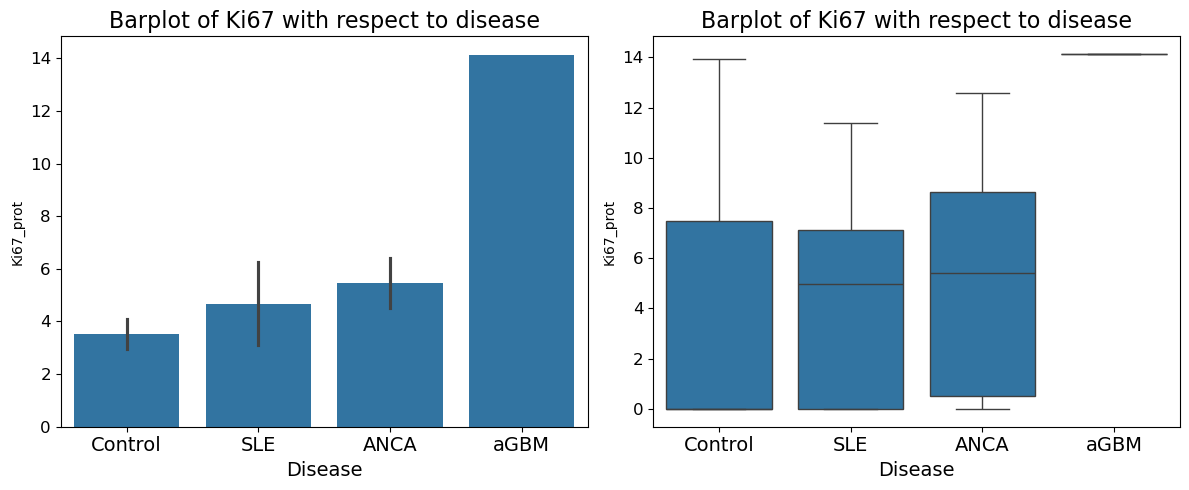

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ch = 'Ki67_prot'
sns.barplot(x='label', y=ch, data=df, ax=axes[0], errorbar='se', order=disease_order)
axes[0].set_title('Barplot of Ki67 with respect to disease', fontsize=16)
axes[0].set_xlabel('Disease', fontsize=14)
# axes[0].set_ylabel('x', fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=12)

sns.boxplot(x='label', y=ch, data=df, ax=axes[1], order=disease_order)
axes[1].set_title('Barplot of Ki67 with respect to disease', fontsize=16)
axes[1].set_xlabel('Disease', fontsize=14)
# axes[1].set_ylabel('x', fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=12)


plt.tight_layout()
plt.show()

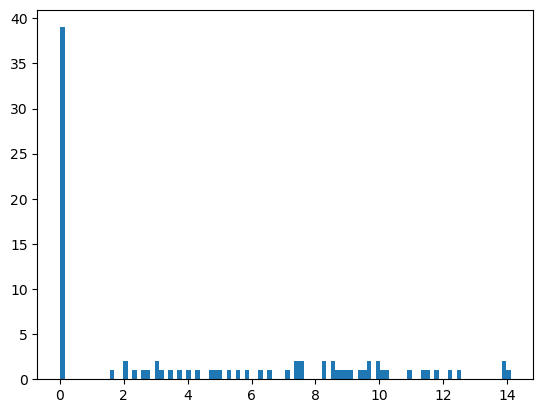

In [63]:
plt.hist(df[ch], 100);


<Axes: xlabel='Ki67_prot', ylabel='Count'>

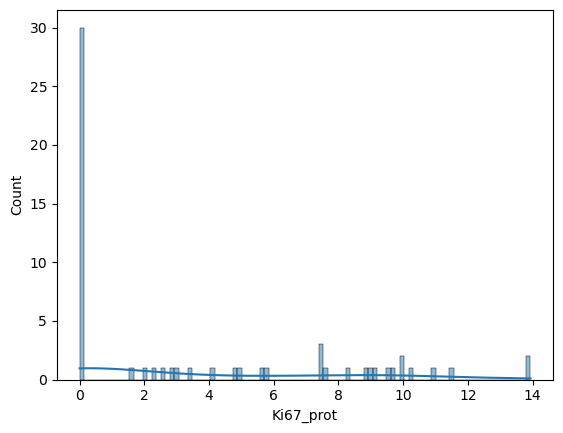

In [66]:
sns.histplot(df.loc[df['Disease'] == disease_order[0], ch], bins= 100,kde = True)

<Axes: xlabel='Ki67_prot', ylabel='Count'>

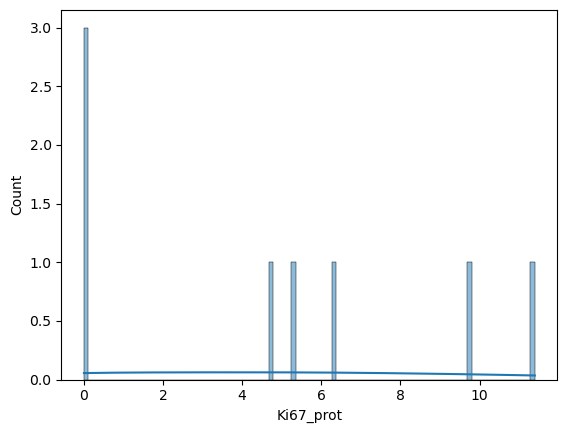

In [67]:
sns.histplot(df.loc[df['Disease'] == disease_order[1], ch], bins= 100,kde = True)

<Axes: xlabel='Ki67_prot', ylabel='Count'>

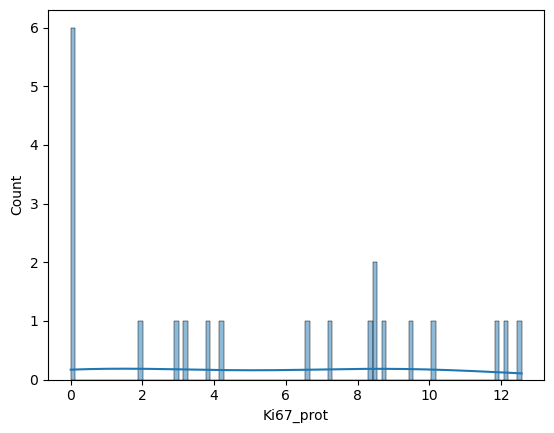

In [68]:
sns.histplot(df.loc[df['Disease'] == disease_order[2], ch], bins= 100,kde = True)

<Axes: xlabel='Ki67_prot', ylabel='Count'>

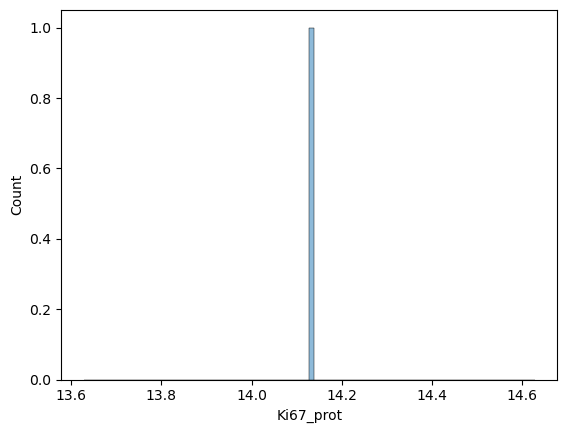

In [69]:
sns.histplot(df.loc[df['Disease'] == disease_order[3], ch], bins= 100,kde = True)

In [34]:
df = df.reset_index(drop=True)
df

,Disease,Ki67_prc,dpt_pseudotime,Pseudotime,Slide_ID,Ki67_prot,CD44_prot,TGFB,PDGF,label
0,ANCA,0,0.557568,0.557568,0011186,3.169925,13.225659,0.039008,0.009414,ANCA
1,ANCA,0,0.416435,0.416435,0011186,0.000000,1.000000,0.020137,0.072077,ANCA
2,ANCA,0,0.417834,0.417834,0011186,12.573411,14.814282,0.004359,0.047995,ANCA
3,Control,0,0.000000,0.000000,0011186,0.000000,0.000000,0.001060,0.038192,Control
4,Control,0,0.106783,0.106783,0011186,0.000000,1.000000,0.033462,0.053815,Control
...,...,...,...,...,...,...,...,...,...,...
85,Control,0,0.239479,0.239479,0011186,3.000000,0.000000,0.005284,0.021387,Control
86,Control,0,0.075411,0.075411,0011186,10.202124,13.682007,0.006020,0.054870,Control
87,Control,0,0.283191,0.283191,0011186,0.000000,0.000000,0.005646,0.011361,Control
88,Control,0,0.093601,0.093601,0011186,8.857981,9.529431,0.001920,0.037695,Control


In [42]:
df = df.reset_index(drop=True)
# df.insert(1, 'Ki67_prc', 0)
th = 1
df.loc[:, 'Ki67_prc'] = [1.0 if i>th else 0.0 for i in df['Ki67_prot']]
df['Ki67_prc'].sum()

51.0

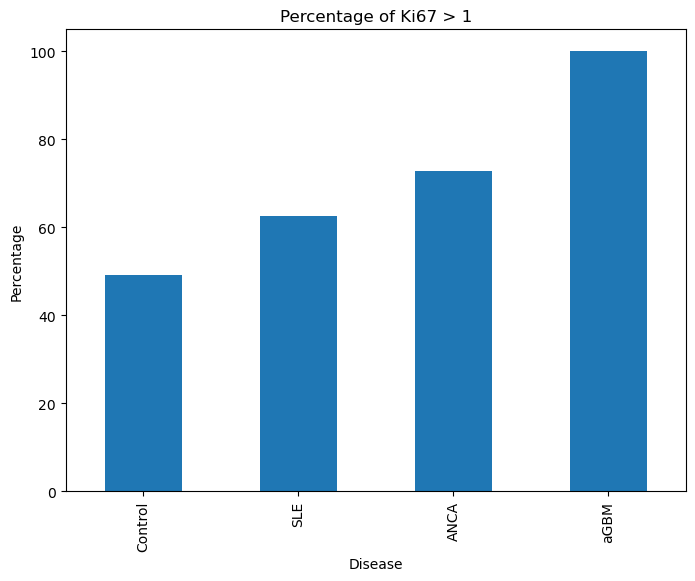

In [43]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ch = 'Ki67_prc'
percent = df.groupby('label')[ch].mean() * 100
percent = percent.reindex(disease_order)
percent.plot(kind='bar', figsize=(8, 6))

plt.title(f'Percentage of Ki67 > {th}')
plt.xlabel('Disease')
plt.ylabel('Percentage')
plt.show()